In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
import os
import cv2
from skimage.io import imread
import keras
from keras.preprocessing import image
from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Flatten,Dense,Dropout,BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import cv2
from tensorflow.keras.applications import VGG16, InceptionResNetV2
from keras import regularizers
from tensorflow.keras.optimizers import Adam

In [2]:
train = pd.read_csv('train.csv', sep=',')
test = pd.read_csv('test.csv', sep=',')

In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73363 entries, 0 to 73362
Data columns (total 12 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Id                                    73363 non-null  int64  
 1   SeriousDlqin2yrs                      73363 non-null  int64  
 2   RevolvingUtilizationOfUnsecuredLines  73363 non-null  float64
 3   age                                   73363 non-null  object 
 4   NumberOfTime30-59DaysPastDueNotWorse  73363 non-null  int64  
 5   DebtRatio                             73363 non-null  float64
 6   MonthlyIncome                         58844 non-null  float64
 7   NumberOfOpenCreditLinesAndLoans       73363 non-null  int64  
 8   NumberOfTimes90DaysLate               73363 non-null  int64  
 9   NumberRealEstateLoansOrLines          73363 non-null  int64  
 10  NumberOfTime60-89DaysPastDueNotWorse  73363 non-null  int64  
 11  NumberOfDepende

In [4]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31442 entries, 0 to 31441
Data columns (total 11 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Id                                    31442 non-null  int64  
 1   RevolvingUtilizationOfUnsecuredLines  31442 non-null  float64
 2   age                                   31442 non-null  object 
 3   NumberOfTime30-59DaysPastDueNotWorse  31442 non-null  int64  
 4   DebtRatio                             31442 non-null  float64
 5   MonthlyIncome                         25180 non-null  float64
 6   NumberOfOpenCreditLinesAndLoans       31442 non-null  int64  
 7   NumberOfTimes90DaysLate               31442 non-null  int64  
 8   NumberRealEstateLoansOrLines          31442 non-null  int64  
 9   NumberOfTime60-89DaysPastDueNotWorse  31442 non-null  int64  
 10  NumberOfDependents                    30625 non-null  float64
dtypes: float64(4), 

In [5]:
train  = train.drop(['Id'], axis=1)
test  = test.drop(['Id'], axis=1)

In [6]:
train.isna().sum()

SeriousDlqin2yrs                            0
RevolvingUtilizationOfUnsecuredLines        0
age                                         0
NumberOfTime30-59DaysPastDueNotWorse        0
DebtRatio                                   0
MonthlyIncome                           14519
NumberOfOpenCreditLinesAndLoans             0
NumberOfTimes90DaysLate                     0
NumberRealEstateLoansOrLines                0
NumberOfTime60-89DaysPastDueNotWorse        0
NumberOfDependents                       1932
dtype: int64

In [7]:
test.isna().sum()

RevolvingUtilizationOfUnsecuredLines       0
age                                        0
NumberOfTime30-59DaysPastDueNotWorse       0
DebtRatio                                  0
MonthlyIncome                           6262
NumberOfOpenCreditLinesAndLoans            0
NumberOfTimes90DaysLate                    0
NumberRealEstateLoansOrLines               0
NumberOfTime60-89DaysPastDueNotWorse       0
NumberOfDependents                       817
dtype: int64

In [8]:
train.describe()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
count,73363.000000,73363.000000,73363.000000,73363.000000,5.884400e+04,73363.000000,73363.000000,73363.000000,73363.000000,71431.000000
mean,0.067227,4.992171,0.423074,350.029652,6.660668e+03,8.465316,0.266933,1.020623,0.241811,0.757066
std,0.250417,188.133666,4.215878,2023.108132,1.268767e+04,5.138928,4.192838,1.138891,4.178167,1.110684
min,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.029743,0.000000,0.175275,3.380000e+03,5.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.153792,0.000000,0.366823,5.400000e+03,8.000000,0.000000,1.000000,0.000000,0.000000
75%,0.000000,0.559024,0.000000,0.869059,8.278500e+03,11.000000,0.000000,2.000000,0.000000,1.000000
max,1.000000,20514.000000,98.000000,329664.000000,1.794060e+06,58.000000,98.000000,54.000000,98.000000,13.000000


In [9]:
test.describe()

,RevolvingUtilizationOfUnsecuredLines,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
count,31442.000000,31442.000000,31442.000000,2.518000e+04,31442.000000,31442.000000,31442.000000,31442.000000,30625.000000
mean,7.024950,0.399752,366.128788,6.740036e+03,8.430443,0.243782,1.017047,0.221010,0.753731
std,273.751164,3.954846,2476.735903,2.101035e+04,5.102363,3.929479,1.132079,3.915983,1.115617
min,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.029879,0.000000,0.174281,3.410750e+03,5.000000,0.000000,0.000000,0.000000,0.000000
50%,0.154535,0.000000,0.366215,5.400000e+03,8.000000,0.000000,1.000000,0.000000,0.000000
75%,0.559792,0.000000,0.863970,8.200000e+03,11.000000,0.000000,2.000000,0.000000,1.000000
max,29110.000000,98.000000,326442.000000,3.008750e+06,57.000000,98.000000,26.000000,98.000000,9.000000


In [10]:
train.tail()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
73358,0,0.147243,85y,0,88.000000,NaN,3,0,0,0,0.0
73359,0,0.135843,66y,0,81.000000,NaN,4,0,0,0,0.0
73360,0,0.064834,38y,0,0.462651,8500.0,9,0,2,0,1.0
73361,0,0.275303,53y,0,0.240470,8000.0,8,0,1,0,1.0
73362,0,0.883390,77y,1,1.992016,500.0,4,0,1,2,0.0


In [11]:
test.tail()

,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
31437,0.027354,74y,0,0.029722,3700.0,6,0,0,1,1.0
31438,1.011101,42y,2,0.195501,3600.0,6,0,0,0,1.0
31439,0.870062,24y,1,0.585610,1500.0,6,0,0,5,0.0
31440,0.015165,47y,0,0.335298,4750.0,9,0,2,0,0.0
31441,0.111492,50y,0,1294.000000,NaN,5,0,1,0,0.0


In [12]:
print(train['NumberOfDependents'].mean())

0.7570662597471686


In [13]:
print(test['NumberOfDependents'].mean())

0.753730612244898


In [14]:
train_null = list(train[train.NumberOfDependents.isnull()].index)
train.loc[train_null, 'NumberOfDependents'] = 1

In [15]:
test_null = list(test[test.NumberOfDependents.isnull()].index)
test.loc[test_null, 'NumberOfDependents'] = 1

In [16]:
train['age'] = train['age'].apply(lambda x : int(x.replace('y',' ')))

In [17]:
test['age'] = test['age'].apply(lambda x : int(x.replace('y',' ')))

In [18]:
train['MonthlyIncome'].fillna(float(train['MonthlyIncome'].mean()), inplace=True)

In [19]:
test['MonthlyIncome'].fillna(float(test['MonthlyIncome'].mean()), inplace=True)

In [20]:
x1 = list(test[test.RevolvingUtilizationOfUnsecuredLines > 2].index)
revolving = test.drop(x1, axis=0)

In [21]:
train = train.drop(list(train[train.RevolvingUtilizationOfUnsecuredLines > 2].index))

In [22]:
revol_mas = revolving[revolving.MonthlyIncome >= 6000]['RevolvingUtilizationOfUnsecuredLines'].mean()
revol_menos = revolving[revolving.MonthlyIncome < 6000]['RevolvingUtilizationOfUnsecuredLines'].mean()


In [23]:
print(f'- Porcentaje de utilizacion creditos revolving en funcion de unos ingresos iguales o superiores a 6000: {revol_mas}')
print(f'- Porcentaje de utilizacion creditos revolving en funcion de unos ingresos menores a 6000: {revol_menos}')

- Porcentaje de utilizacion creditos revolving en funcion de unos ingresos iguales o superiores a 6000: 0.2825693786324712
- Porcentaje de utilizacion creditos revolving en funcion de unos ingresos menores a 6000: 0.3669582162473858


In [24]:
test_mas = test[(test.RevolvingUtilizationOfUnsecuredLines > 2) & (test.MonthlyIncome >= 6000)].index
test.loc[test_mas, 'RevolvingUtilizationOfUnsecuredLines'] = 0.289

In [25]:
test_menos = test[(test.RevolvingUtilizationOfUnsecuredLines > 2) & ((test.MonthlyIncome < 6000) | (test.MonthlyIncome.isnull()))].index
test.loc[test_menos, 'RevolvingUtilizationOfUnsecuredLines'] = 0.365

In [26]:
train['DebtRatio']= np.where(train['DebtRatio']>1,1,train['DebtRatio'])

In [27]:
correlacion=train.corr()
df2 = pd.DataFrame()
df2 = correlacion


<AxesSubplot:>

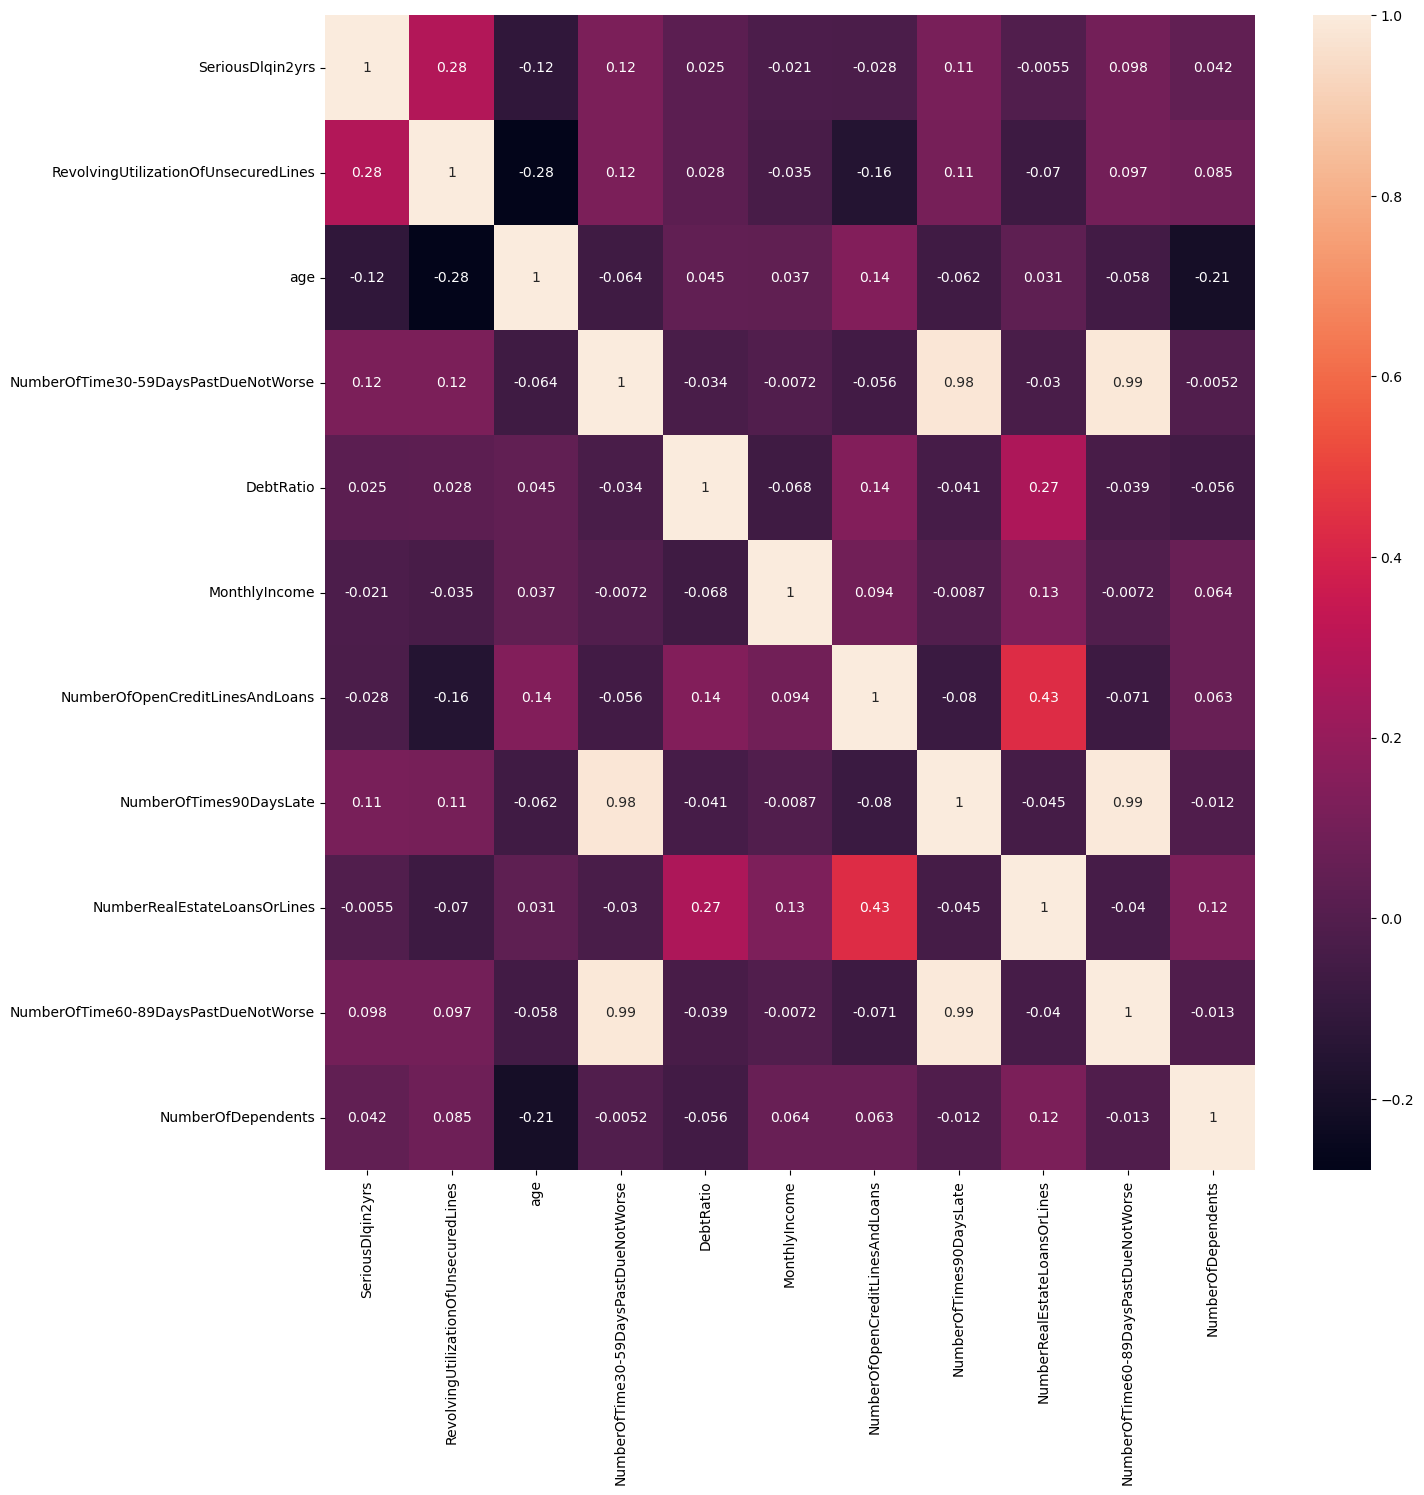

In [29]:
import seaborn as sns

plt.figure(figsize=(15,15))
sns.heatmap(correlacion, annot=True)

In [30]:
train['SeriousDlqin2yrs'].value_counts(normalize=True)

0    0.932992
1    0.067008
Name: SeriousDlqin2yrs, dtype: float64

In [31]:
train['SeriousDlqin2yrs'].abs().sort_values(ascending=False)

24062    1
67710    1
24238    1
6057     1
15771    1
        ..
25330    0
25331    0
25332    0
25333    0
73362    0
Name: SeriousDlqin2yrs, Length: 73200, dtype: int64

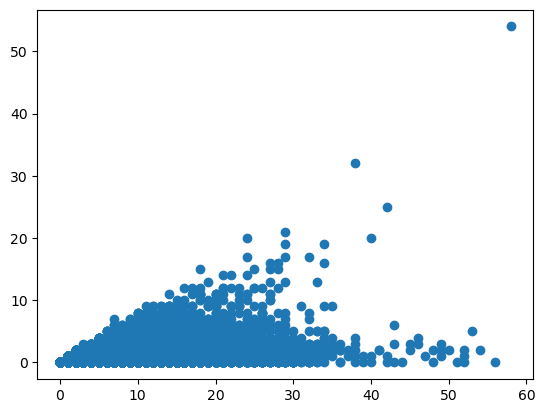

In [32]:
plt.scatter(x='NumberOfOpenCreditLinesAndLoans', y='NumberRealEstateLoansOrLines', data=train);

In [33]:
train_copy = train.copy()
test_copy = test.copy()

In [34]:
X = train_copy.drop(['SeriousDlqin2yrs'], axis=1)
y = train_copy['SeriousDlqin2yrs']

In [35]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [36]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

In [37]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
test_copy = scaler.transform(test_copy)

MODELO 1

In [38]:
from sklearn.ensemble import AdaBoostClassifier

abc = AdaBoostClassifier(n_estimators=400, learning_rate=0.1)


In [39]:
modelo1 = abc
modelo1.fit(X_train, y_train)

AdaBoostClassifier(learning_rate=0.1, n_estimators=400)

In [40]:
pred1 = modelo1.predict_proba(X_test)

In [41]:
from sklearn import metrics
auc = metrics.roc_auc_score(y_test, pred1[:, 1])
print('AUC:', auc)

AUC: 0.8558172166189653


MODELO 2

In [78]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(max_iter=1000)

In [79]:
modelo2 = log_reg
modelo2.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [80]:
pred2 = modelo2.predict_proba(X_test)

In [92]:
from sklearn import metrics
print('AUC:', metrics.roc_auc_score(y_test, pred3[:, 1]))

ROC SCORE 0.7947321273541544


MODELO 3

In [43]:
from sklearn.ensemble import RandomForestClassifier
from enum import auto

rfc = RandomForestClassifier(n_estimators=600,
                            max_leaf_nodes=18,
                            max_depth=12,
                            max_features='auto')

In [44]:
modelo3 = rfc
modelo3.fit(X_train, y_train)

/Users/tarikelhannacharchi/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


RandomForestClassifier(max_depth=12, max_features='auto', max_leaf_nodes=18,
                       n_estimators=600)

In [45]:
pred3 = modelo3.predict(X_test)

In [46]:
metrics.accuracy_score(y_test, pred3)

0.9351092896174863

In [47]:
metrics.roc_auc_score(y_test, pred3)

0.5441634237332299